In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
# Signal parameters
fs = 10000  # Sampling frequency (Hz)
t_duration = 10  # Duration (seconds)
f0 = 15  # Fundamental frequency (Hz)

# Time vector
t = np.linspace(0, t_duration, int(fs * t_duration), endpoint=False)

# Generate signal: 15 Hz with 2 harmonics
signal_data = (np.sin(2 * np.pi * f0 * t) +          # Fundamental (15 Hz)
               0.5 * np.sin(2 * np.pi * 2 * f0 * t) +  # 2nd harmonic (30 Hz)
               0.3 * np.sin(2 * np.pi * 3 * f0 * t))   # 3rd harmonic (45 Hz)

print(f"Signal parameters:")
print(f"  Sampling frequency: {fs} Hz")
print(f"  Duration: {t_duration} s")
print(f"  Fundamental frequency: {f0} Hz")
print(f"  Number of samples: {len(signal_data)}")

Signal parameters:
  Sampling frequency: 10000 Hz
  Duration: 10 s
  Fundamental frequency: 15 Hz
  Number of samples: 100000


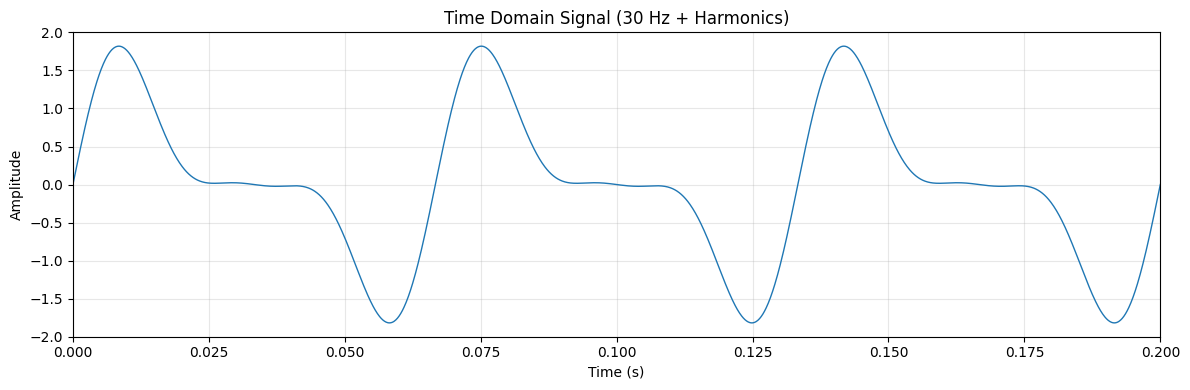

In [28]:
# Plot time domain (zoomed in to show first 0.2 seconds)
plt.figure(figsize=(12, 4))
xlim_max = 0.2  # Show only first 0.2 seconds
mask = t <= xlim_max

plt.plot(t[mask], signal_data[mask], linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain Signal (30 Hz + Harmonics)')
plt.grid(True, alpha=0.3)
plt.xlim(0, xlim_max)
plt.tight_layout()
plt.show()

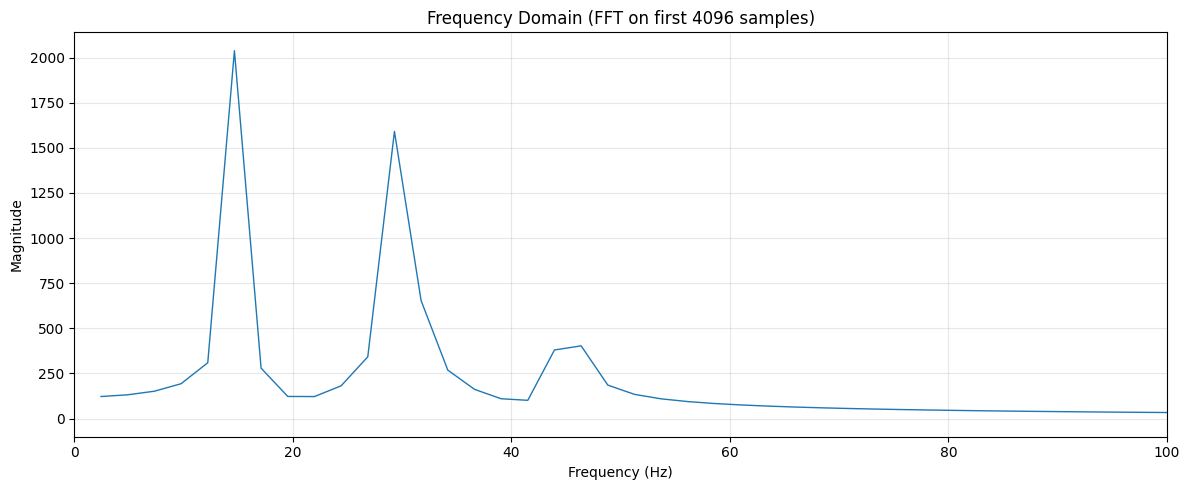


FFT computed on 4096 samples (0.4096 s)
Frequency resolution: 2.441 Hz

Detected peaks:
  14.6 Hz: magnitude 2038
  29.3 Hz: magnitude 1591
  46.4 Hz: magnitude 403


In [29]:
# Compute FFT on first 4096 samples only
n_samples = 4096
signal_subset = signal_data[:n_samples]
fft_values = np.fft.fft(signal_subset)
fft_freq = np.fft.fftfreq(n_samples, 1/fs)

# Get positive frequencies only
positive_freq_idx = fft_freq > 0
fft_magnitude = np.abs(fft_values[positive_freq_idx])
fft_freq_positive = fft_freq[positive_freq_idx]

# Plot frequency domain
plt.figure(figsize=(12, 5))
plt.plot(fft_freq_positive, fft_magnitude, linewidth=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Frequency Domain (FFT on first {n_samples} samples)')
plt.grid(True, alpha=0.3)
plt.xlim(0, 100)  # Show up to 100 Hz to see all harmonics clearly
plt.tight_layout()
plt.show()

# Print peak frequencies
peak_indices = signal.find_peaks(fft_magnitude, height=100)[0]
peak_freqs = fft_freq_positive[peak_indices]
peak_mags = fft_magnitude[peak_indices]
print(f"\nFFT computed on {n_samples} samples ({n_samples/fs:.4f} s)")
print(f"Frequency resolution: {fs/n_samples:.3f} Hz")
print(f"\nDetected peaks:")
for freq, mag in zip(peak_freqs, peak_mags):
    print(f"  {freq:.1f} Hz: magnitude {mag:.0f}")

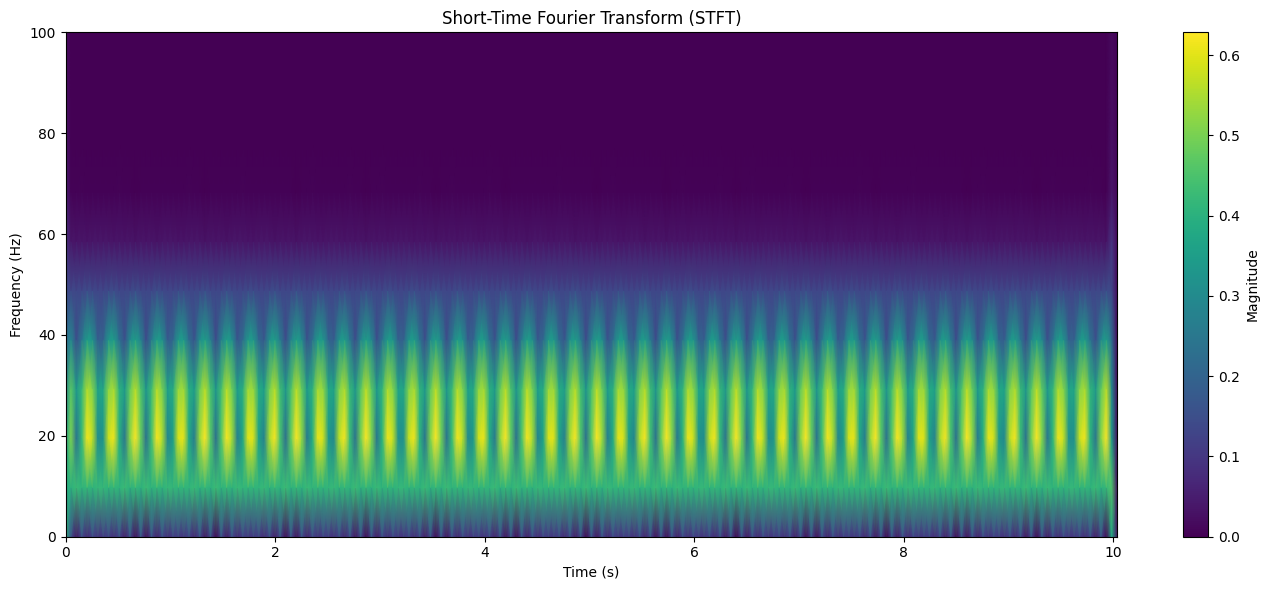


STFT parameters:
  Segment length: 1024 samples (0.102 s)
  Overlap: 512 samples
  Frequency resolution: 9.77 Hz


In [31]:
# Compute Short-Time Fourier Transform (STFT)
nperseg = 1024  # Segment length
noverlap = 512  # Overlap between segments

f_stft, t_stft, Zxx = signal.stft(signal_data, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Plot STFT spectrogram
plt.figure(figsize=(14, 6))
plt.pcolormesh(t_stft, f_stft, np.abs(Zxx), shading='gouraud', cmap='viridis')
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Short-Time Fourier Transform (STFT)')
plt.ylim(0, 100)  # Focus on frequency range with harmonics
plt.tight_layout()
plt.show()

print(f"\nSTFT parameters:")
print(f"  Segment length: {nperseg} samples ({nperseg/fs:.3f} s)")
print(f"  Overlap: {noverlap} samples")
print(f"  Frequency resolution: {fs/nperseg:.2f} Hz")